In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt, sin
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt, random
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from copy import copy
%matplotlib inline

## Ex 1

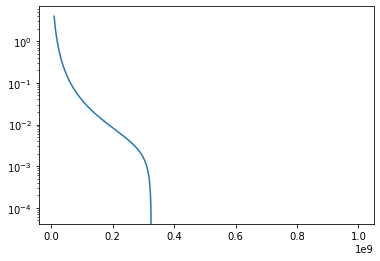

In [2]:
G = 6.674 * 10**-11
M = 5.974 * 10**24
m = 7.348 * 10**22
R = 3.844 * 10**8
w = 2.662 * 10**-6

func = lambda r: (G*M) / (r**2) - (G*m)/(R-r)**2 - w**2 * r


x = np.linspace(1e7, 1e9, num=1000)
y = func(x)
plt.yscale('log')
plt.plot(x, y)
plt.plot(x, y*0)

In [3]:
def newton(eq, p0, previous=None, max_depth=50, thr = 1e-10, iterations=0):
    previous = p0 + 1

    while True:
        # Compute tangent line at point p1
        delta = 1e-5
        a = (eq(p0+delta) - eq(p0)) / delta
        b = eq(p0) - a * p0

        p0 = -b/a # Zero da tangente aka novo ponto 
        iterations += 1

        if iterations >= max_depth or abs(previous-p0)<=thr:
            break
        previous = p0

    print(f"Zero found at {p0} - Iteration {iterations}")
    return p0


In [4]:
print(f"> The distance is {newton(func, 1e6)/1e3}km")

Zero found at 326045071.66535544 - Iteration 22
> The distance is 326045.07166535547km


## Ex 2

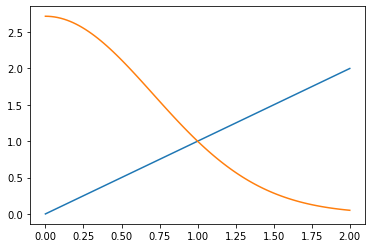

In [17]:
def eq2(x):
    return np.exp(1-x**2)

x = np.linspace(0, 2, num=100)

plt.plot(x, x)
plt.plot(x, eq2(x))

In [21]:
x0 = 1/2


def relax(eq, x0, max_depth=1e3, iter=0):
    print(f"X0:{x0} | Iter:{iter}")
    if iter > max_depth:
        return x0
    return relax(eq, eq(x0), max_depth, iter+1)

relax(eq2, x0, max_depth=10)

X0:0.5 | Iter:0
X0:2.117000016612675 | Iter:1
X0:0.030755419069985038 | Iter:2
X0:2.715711832754083 | Iter:3
X0:0.0017034651847384463 | Iter:4
X0:2.71827394057758 | Iter:5
X0:0.001679913095081425 | Iter:6
X0:2.7182741571849562 | Iter:7
X0:0.0016799111168229455 | Iter:8
X0:2.7182741572030236 | Iter:9
X0:0.0016799111166579386 | Iter:10
X0:2.7182741572030253 | Iter:11


2.7182741572030253

Não converge....

Fazendo o logaritmo nos dois lados da equação...

In [26]:
x = 1/2

for _ in range(10):
    x = np.log(x)
    x = 1-x**2
    print(x)

0.5195469860817986
0.5712395428979806
0.6864597574518259
0.858467784990345
0.9767113708833908
0.9994447334526998
0.999999691507774
0.9999999999999049
1.0
1.0


## Ex 3

In [62]:
R1 = R3 = R5 = 1000
R2 = R4 = R6 = 2000
C1 = 1*1e-6
C2 = 0.5 * 1e-6
x_plus = 3
w = 1000


from numpy.linalg import solve
from cmath import polar, pi


matrix = np.array([
                    [(1/R1)+(1/R4)+1j*w*C1, -1j*w*C1,                       0],
                    [-1j*w*C1,              1/R2+1/R5+1j*w*C1+1j*w*C2,      -1j*w*C2],
                    [0,                     -1j*w*C2,                       1/R3+1/R6+1j*w*C2]
                    ], complex)

sol = np.array([x_plus/R1, x_plus/R2, x_plus/R3], float)

In [63]:
x = solve(matrix, sol)

for solution in x:
    r, phi = polar(solution)
    print(r)

1.7014390658777336
1.4806053465364064
1.8607693200562134


#### Ex 4 -> Casa

#### Ex 5 -> Mais do mesmo

## Ex 6

In [85]:
from banded import banded

N = 6
V_plus = 5

# Construção da matriz solução
solucao=np.zeros([N],dtype=np.float64)
solucao[0]=V_plus
solucao[1]=V_plus

## Construção matriz do sistema
# Inicializar a zeros
matriz=np.zeros([N,N],dtype=np.float64)

# Primeira massa
matriz[0][0]=3
matriz[0][1]=-1
matriz[0][2]=-1

matriz[1][0]=-1
matriz[1][1]=4
matriz[1][2]=-1
matriz[1][3]=-1

# Ultima massa
matriz[-2][-4]= -1
matriz[-2][-3]= -1
matriz[-2][-2]= 4
matriz[-2][-1]= -1


matriz[-1][-3] = -1
matriz[-1][-2] = -1
matriz[-1][-1] = 3


# Massas restantes
for i in range(2,N-2, 1):
    matriz[i][i]=4
    matriz[i][i-1]=-1
    matriz[i][i-2]=-1

    matriz[i][i+1]=-1
    matriz[i][i+2]=-1

matriz

array([[ 3., -1., -1.,  0.,  0.,  0.],
       [-1.,  4., -1., -1.,  0.,  0.],
       [-1., -1.,  4., -1., -1.,  0.],
       [ 0., -1., -1.,  4., -1., -1.],
       [ 0.,  0., -1., -1.,  4., -1.],
       [ 0.,  0.,  0., -1., -1.,  3.]])

In [86]:
solve(matriz, solucao)

array([3.7254902 , 3.43137255, 2.74509804, 2.25490196, 1.56862745,
       1.2745098 ])

Para a banded..

In [87]:
up = down = 2

# Inicializar a matriz banded
matrix = np.ones((1+up+down, N))

# Diagonais "parciais" nao nulas
matrix[0] = -1
matrix[1] = -1
matrix[3] = -1
matrix[4] = -1

# Diagonal
matrix[2] = 4
matrix[2][0] = matrix[2][-1] = 3

matrix

array([[-1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1.],
       [ 3.,  4.,  4.,  4.,  4.,  3.],
       [-1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1.]])

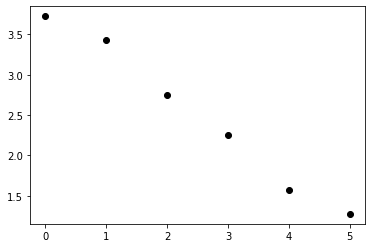

In [89]:
solution = banded(matrix, solucao, 2, 2)


plt.plot([i for i in range(len(solution))], solution, 'ko')